In [9]:
pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.0.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached namex-0.0.9-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.15

In [1]:
import tensorflow as tf 
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [3]:
#preprocessing the data
X_train=X_train/255.0
X_test=X_test/255.0


In [4]:
model=models.Sequential(

    [

        layers.Flatten(input_shape=(28,28)),
        layers.Dense(128,activation='relu'),
        layers.Dense(10, activation='softmax') 

    ]
)

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8834 - loss: 0.4156
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9638 - loss: 0.1241
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9774 - loss: 0.0773
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9832 - loss: 0.0555
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9872 - loss: 0.0438


In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9743 - loss: 0.0795
Test accuracy: 0.9776999950408936


In [10]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))
cr=classification_report(y_test, model.predict(X_test).argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Text(0.5, 1.0, 'Confusion Matrix')

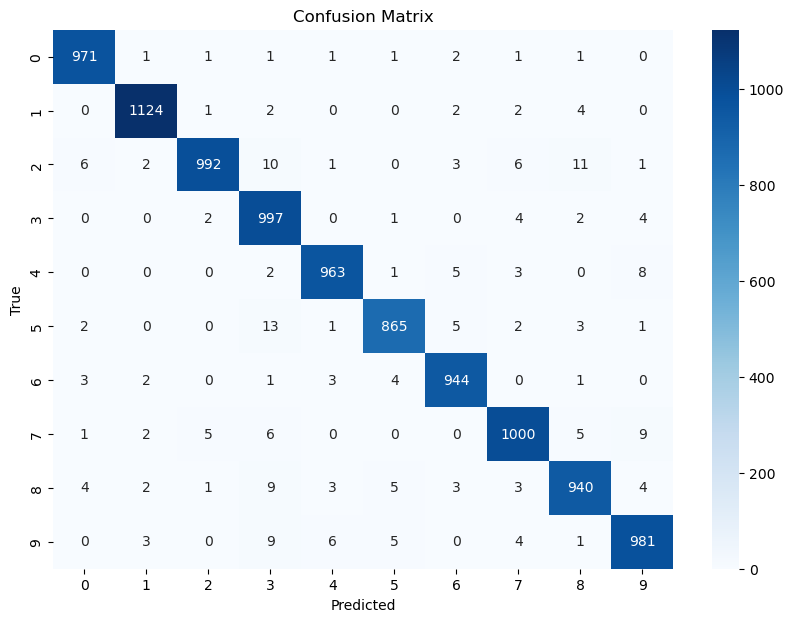

In [11]:
#ploting cm
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [12]:
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



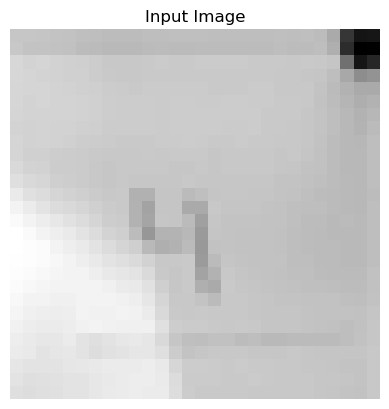

Predicted digit: 5


In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    # Open and convert the image to grayscale
    img = Image.open(path).convert('L')

    # Resize to 28x28
    img = img.resize((28, 28))

    # Convert to numpy array
    img_array = np.array(img)

    # Display the image
    plt.imshow(img_array, cmap='gray')
    plt.title("Input Image")
    plt.axis("off")
    plt.show()

    # Invert colors if the image is too bright
    if img_array.mean() > 127:
        img_array = 255 - img_array

    # Normalize pixel values
    img_array = img_array / 255.0

    # Reshape to match model input (remove channel dimension)
    img_array = img_array.reshape(1, 28, 28)

    return img_array

# Path to the image
img_path = 'images/im3.jpeg'

# Preprocess the image
img_array = preprocess_image(img_path)

# Predict the digit
predict = model.predict(img_array, verbose=0)

# Print the predicted digit
print(f"Predicted digit: {np.argmax(predict)}")